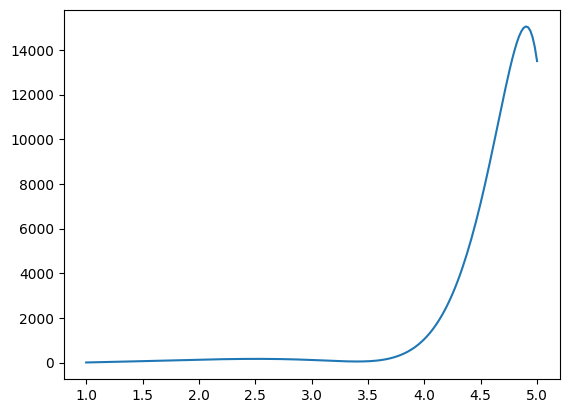

In [10]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1, 2, 3, 4, 5])
y = np.array([3, 128, 115, 1050, 13500])

matrix = np.zeros([5, 5])

for i in range(0,5):
    for j in range(0,5):
        matrix[i][j] = (np.e) ** (j*x[i])

res = np.linalg.solve(matrix, y)

def f(_x):
    func = 0
    for i in range(0,5):
        func += res[i]*((np.e)**(i*_x))
    return func    

x_axis = np.linspace(x[0], x[4], 200)
plt.plot(x_axis, f(x_axis))
plt.show()

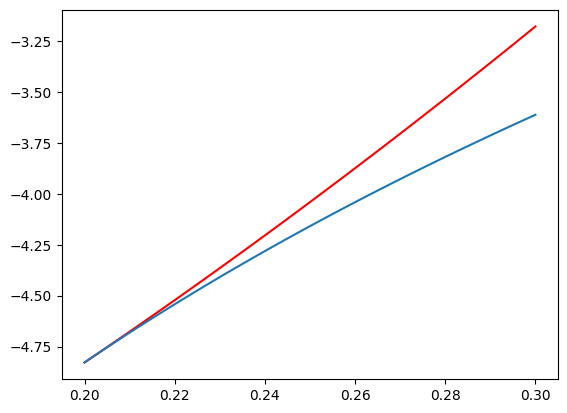

In [47]:
import math
from sympy import symbols, diff 

def f(x):
    return np.log(x ** 3)

_x = symbols('x')
nodes = np.array([0.2, 0.2, 0.3])
values = np.array([f(0.2), f(0.2), f(0.3)])

def relative_error(exact_value, func_value):
    return (exact_value - func_value) / exact_value

def divided_difference_hermite(nodes, values):
    if nodes.size == 1:
        return values[0]
    else:
        same_nodes = False
        for i in range(0, nodes.size):
            count = np.sum(nodes == nodes[i])
            if count > 1:
                same_nodes = True
                break
        if same_nodes:
            return 3 * (1 / nodes[0])
        else:
            return (divided_difference_hermite(nodes[1:], values[1:]) - divided_difference_hermite(nodes[:-1], values[:-1])) / (nodes[-1] - nodes[0]) 
    
def poly_hermit(nodes, values, _x):
    poly = 0
    multi = 1
    for i in range (0, nodes.size):
        poly += divided_difference_hermite(nodes[:i + 1], values[:i + 1]) * multi
        multi *= (_x - nodes[i])
    return poly    

x_axis = np.linspace(0.2, 0.3, 100)
plt.plot(x_axis, poly_hermit(nodes,values, x_axis), '-r')
plt.plot(x_axis, f(x_axis))
plt.show()

In [48]:
x = symbols('x')

def poly_newton(nodes, values, x):
    poly = 0
    multi = 1
    for i in range(0, nodes.size):
        poly += divided_differences(nodes[ i + 1], values[: i + 1]) * multi
        multi *= (x - nodes[i])
    return poly    

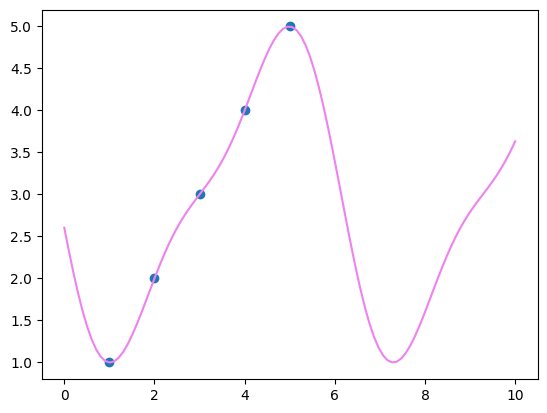

In [69]:
nodes = np.array([1, 2, 3, 4, 5])
values = np.array([1, 2, 3, 4, 5])
matrix = np.ones([5,5])

for i in range (0,5):
    for j in range (1,5):
        if j % 2 == 0:
            matrix[i][j] = np.sin(nodes[i] * (j / 2))
        else:
            matrix[i][j] = np.cos(nodes[i] * (math.floor(j / 2) + 1))

result = np.linalg.solve(matrix, values)

def trigonometry_poly(x):
    return result[0] + result[1]*np.cos(x) + result[2]*np.sin(x) + result[3]*np.cos(2*x) + result[4]*np.sin(2*x)

x_axis = np.linspace(0, 10, 100)
plt.scatter(nodes,values)
plt.plot(x_axis, trigonometry_poly(x_axis), color='violet')
plt.show()

C:\Users\evaba\AppData\Local\Temp\ipykernel_9608\2179920573.py:25: RuntimeWarning: invalid value encountered in divide
  return (f(x) - L3(x)) / f(x)


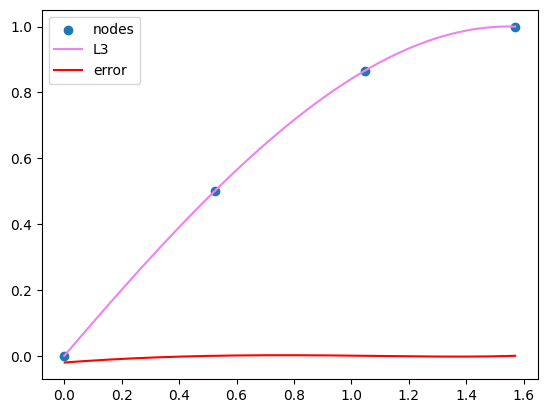

In [85]:
nodes = np.array([0, math.pi / 6, math.pi / 3, math.pi / 2])

def f(x):
    return np.sin(x)

values = np.array([f(nodes[0]), f(nodes[1]), f(nodes[2]), f(nodes[3])])

    
def l0(x):
    return ((x-nodes[1]) * (x-nodes[2]) * (x- nodes[3])) / ((nodes[0]-nodes[1]) * (nodes[0]-nodes[2]) * (nodes[0]- nodes[3]))

def l1(x):
    return ((x-nodes[0]) * (x-nodes[2]) * (x- nodes[3])) / ((nodes[1]-nodes[0]) * (nodes[1]-nodes[2]) * (nodes[1]- nodes[3]))

def l2(x):
     return ((x-nodes[1]) * (x-nodes[0]) * (x- nodes[3])) / ((nodes[2]-nodes[1]) * (nodes[2]-nodes[0]) * (nodes[2]- nodes[3]))

def l3(x):
     return ((x-nodes[1]) * (x-nodes[2]) * (x- nodes[0])) / ((nodes[3]-nodes[1]) * (nodes[3]-nodes[2]) * (nodes[3]- nodes[0]))

def L3(x):
    return values[0]*l0(x) + values[1]*l1(x) + values[2]*l2(x) + values[3]*l3(x) 

def realtive_error(x):
    return (f(x) - L3(x)) / f(x)

plt.scatter(nodes, values)
x_axis = np.linspace(0, math.pi / 2, 1000)
plt.plot(x_axis, L3(x_axis), color='violet')
plt.plot(x_axis, realtive_error(x_axis), color='r')
plt.legend(['nodes', 'L3', 'error'])
plt.show()

In [77]:
f(math.pi / 5)

0.5877852522924731

In [82]:
L3(math.pi / 5)

np.float64(0.5870614872174387)